In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("Height-width.xlsx")

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


# Data Analysis

In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.Height.std()

2.858583328142099

In [8]:
df.shape

(3501, 2)

In [9]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Weight')

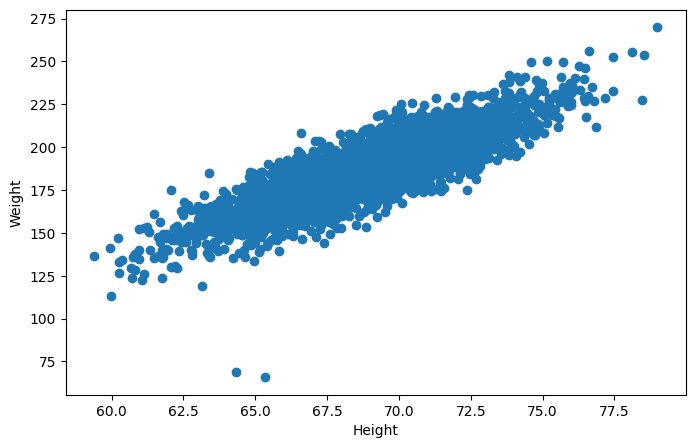

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [13]:
x=df[["Height"]]

In [14]:
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [15]:
y = df["Weight"]

In [16]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,random_state=30)

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [21]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [22]:
m = reg.coef_

In [23]:
m

array([5.95885434])

In [24]:
c = reg.intercept_

In [25]:
c

-224.4890880214966

In [26]:
y = m*1100+c
y

array([6330.25068422])

In [27]:
reg.predict([[1100]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6330.25068422])

In [28]:
pred = reg.predict(xtest)
pred

array([169.25231735, 187.81491516, 178.95712836, ..., 179.60636372,
       156.80563409, 182.72851141])

In [29]:
df["Predicted Result"] = reg.predict(x)


In [30]:
df

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.554530
1,68.781904,162.310473,185.372259
2,74.110105,212.740856,217.122235
3,71.730978,220.042470,202.945364
4,69.881796,206.349801,191.926354
...,...,...,...
3496,69.296830,185.649086,188.440628
3497,70.542201,210.198845,195.861615
3498,73.912549,202.429960,215.945026
3499,67.396021,144.277671,177.113983


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# mse

In [32]:
mse = mean_squared_error(ytest, pred)

In [33]:
mse

113.22002986186213

# mae

In [34]:
mae = mean_absolute_error(ytest, pred)

In [35]:
mae

8.12081588680904

# Best fit line

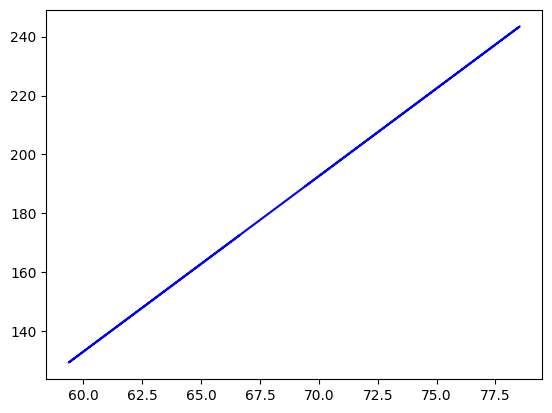

In [36]:
plt.plot(xtrain, reg.predict(xtrain),color="blue")

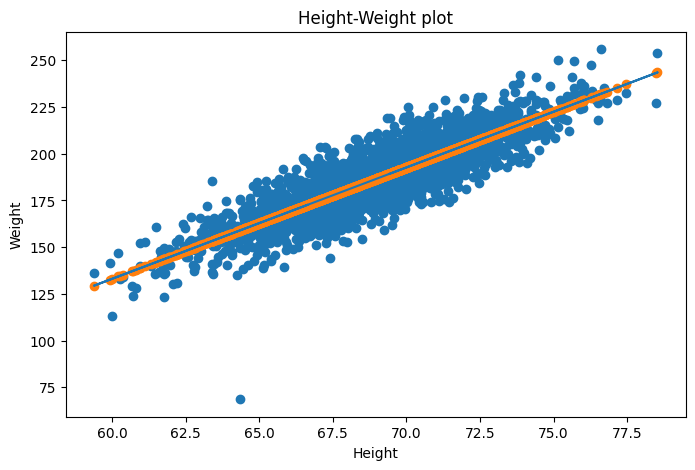

In [39]:
plt.figure(figsize=(8,5))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain, reg.predict(xtrain))
plt.scatter(xtrain, reg.predict(xtrain))

In [40]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7303443162999943

In [41]:
xtest.to_csv("xtest.csv")

# Save model

In [42]:
import pickle as pk
import joblib as jb

In [44]:
pk.dump(reg, open("first", "wb"))

In [45]:
reg2 = pk.load(open("first", "rb"))

In [46]:
reg2.predict([[1100]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6330.25068422])

In [47]:
jb.dump(reg, "second")

['second']